# Neighborhood Prediction On NY AirBnb Dataset

* Ali Emre Eser


In [1]:
#  Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate, KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer



from sklearn import set_config
set_config(transform_output="pandas") 
from sklearn.impute import SimpleImputer


## Introduction

### Dataset
The New York City Airbnb dataset is a collection of data related to short-term rental listings available on the Airbnb platform within the New York City area. This dataset typically contains information about various aspects of each listing, providing valuable insights into the Airbnb market in the city.
### Features
* **'id'**: A unique identifier for each listing
* **'name'**: Title of the listing
* **'host_id'**: The unique identifier of the host 
* **'host_name'**: The name of the host
* **'neighbourhood_group'**: neighborhood group in which the listing is located (Manhattan, Brooklyn, Queens, Staten Island, Bronx)
* **'neighbourhood'**: Specific neighbourhood
* **'latitude'** and **'longitude'**: Geographical coordinates
* **'room_type'**: Type of the room (Private room, Entire home/apt, Shared room)
* **'price'**: Nightly price for the property
* **'minimum_nights'**: The minimum number of nights required for booking.
* **'number_of_reviews'**: The total number of reviews
* **'last_review'**: The date of the last review.
* **'reviews_per_month'**: The average number of reviews per month
* **'calculated_host_listings_count'**: The count of listings belonging to the host.
* **'availability_365'**: The number of days the listing is available in a year.

In [2]:
df=pd.read_csv('train.csv')
df.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [3]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Columns **'last_review'** and **'reviews_per_month'** have an equal number of missing values. Possibly the same rows are missing. **'name'** and **'host_name'** columns have small number of missing values they can be deleted.
* Since **'last_review'** column is not used in predictions and data exploration, it is deleted.


In [6]:
df = df.drop('last_review', axis=1)

In [7]:
df=df.drop(df[df['name'].isnull()|df['host_name'].isnull()].index) 

df.isna().sum() # check if deleted

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Data Exploration

* **Average Prices Graph** shows average prices for each **'neighbourhood_group'**
* **Total Prices Graph** shows total prices for each **'neighbourhood_group'**
* **Neighbourhood Counts Graph** represents total number of listings for each **'neighbourhood_group'**

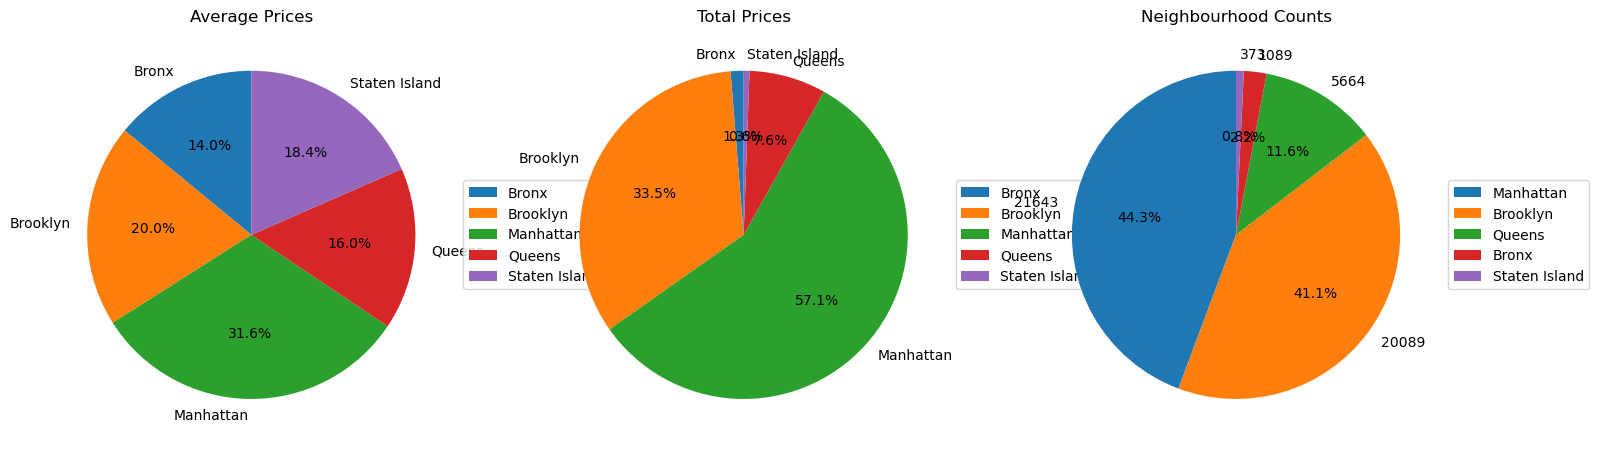

In [76]:
# Mahallelerin ortalama fiyatlarını hesapla
avg_prices = df.groupby('neighbourhood_group')['price'].mean().sort_index()

# Mahallelerin toplam fiyatlarını hesapla
total_prices = df.groupby('neighbourhood_group')['price'].sum().sort_index()

# Mahalle sayılarını içeren grafik
labels_count = df.neighbourhood_group.value_counts().index
shape_count = df.neighbourhood_group.value_counts().values

# Subplots oluştur
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# İlk grafik: Mahallelerin ortalama fiyatları
labels_avg = avg_prices.index
values_avg = avg_prices.values
axs[0].pie(values_avg, labels=labels_avg, autopct='%1.1f%%', startangle=90)
axs[0].legend(labels_avg, loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_title('Average Prices')

# İkinci grafik: Mahallelerin toplam fiyatları
labels_total = total_prices.index
values_total = total_prices.values
axs[1].pie(values_total, labels=labels_total, autopct='%1.1f%%', startangle=90)
axs[1].legend(labels_total, loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set_title('Total Prices')

# Üçüncü grafik: Mahalle sayıları
axs[2].pie(shape_count, labels=shape_count, autopct='%1.1f%%', startangle=90)
axs[2].legend(labels_count, loc='center left', bbox_to_anchor=(1, 0.5))
axs[2].set_title('Neighbourhood Counts')

# Grafikleri göster
plt.show()

The graphs above show that the most expensive homes in the city are in Manhattan, while the cheapest are in the Bronx. There is a two-fold price difference between them, and Manhattan has the highest number of listings. Overall commercial dominance in the sector is dominated by Manhattan.

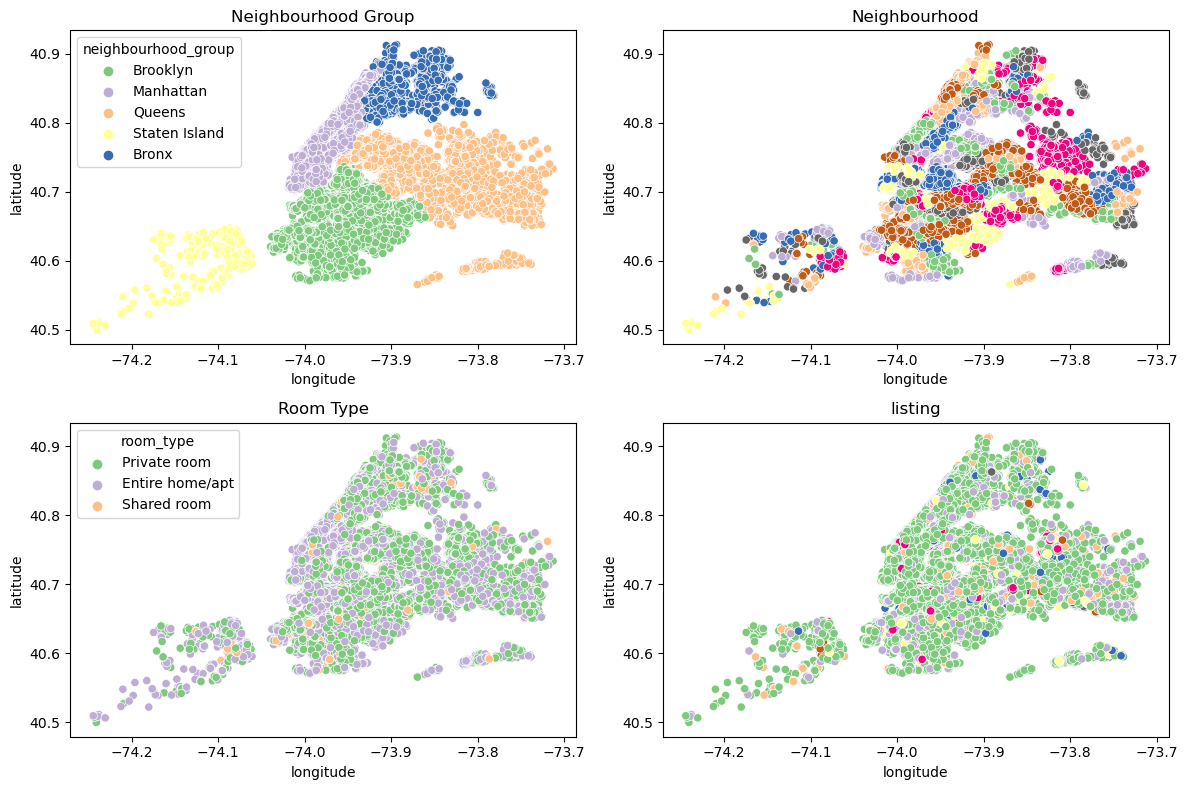

In [14]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)  #  satır,  sütun,  grafik
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='Accent')
plt.title('Neighbourhood Group')

# İkinci grafik
plt.subplot(2, 2, 2)  # 1 satır, 2 sütun, 2. grafik
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood', palette='Accent',legend=False)
plt.title('Neighbourhood')

plt.subplot(2, 2, 3)  # 1 satır, 2 sütun, 2. grafik
sns.scatterplot(data=df, x='longitude', y='latitude', hue='room_type', palette='Accent')
plt.title('Room Type')

plt.subplot(2, 2, 4)  # 1 satır, 2 sütun, 2. grafik
sns.scatterplot(data=df, x='longitude', y='latitude', hue='calculated_host_listings_count', palette='Accent',legend=False)
plt.title('listing')

plt.tight_layout()

# Grafiği göster
plt.show()


In [15]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [16]:
# Haritada tüm evler

import geopandas as gpd
import folium
from folium.plugins import MarkerCluster



# Geopandas GeoDataFrame oluşturun
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Folium haritası oluşturun
ny_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Scatter plot için MarkerCluster oluşturun
marker_cluster = MarkerCluster().add_to(ny_map)

# Evleri haritaya ekleyin
for index, row in gdf.iterrows():
    #popup_text = f"Ev İsmi: {row['name']} <br> Ev Sahibi ID: {row['host_id']}<br>Fiyat: ${row['price']}"
    popup_text = "Ev İsmi: {} ----- Ev Sahibi ID: {} ----- Fiyat: ${}".format(row['name'], row['host_id'], row['price'])

    folium.Marker([row['latitude'], row['longitude']],
                  popup=folium.Popup(popup_text, parse_html=True)).add_to(marker_cluster)

# Folium haritasını göster
ny_map.save("ny_map_with_prices.html")


## Feature Enginnering

In [8]:

# Calculate the mean price for each neighborhood
neighborhood_means = df.groupby('neighbourhood')['price'].transform('mean')

# Create a new column with the mean prices
df['neighborhood_mean_price'] = neighborhood_means

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighborhood_mean_price
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,92.885714
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,282.719094
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,118.952542
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,181.893357
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,133.193548


## Outlier
We will look at the extremes of the column values to catch outliers.
* **'Price'** Column

In [9]:
# This plotter function will be used for each column that wanted to be checked.

def plotter(df,feature,figsize_width,figsize_height):
    plt.figure(figsize=(figsize_width,figsize_height))
    sns.boxplot(data=df,x=feature)
    plt.show()

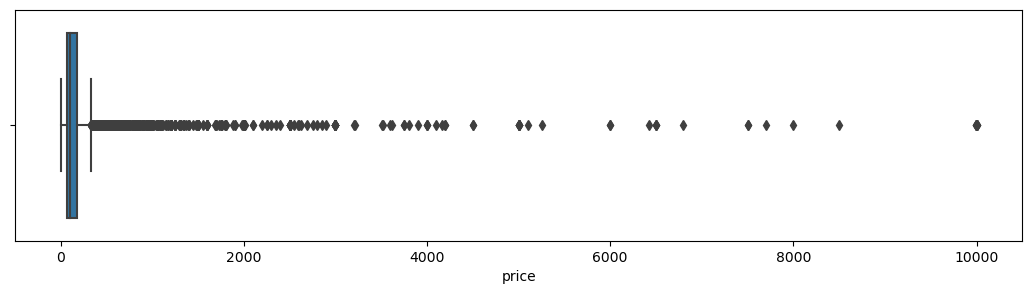

In [10]:
plotter(df,'price',13,3)

Rows with a **'price'** value greater than 1500 are identified as outlier. No statistical method was used here.  Outliers were intuitively trimmed based on chart data.

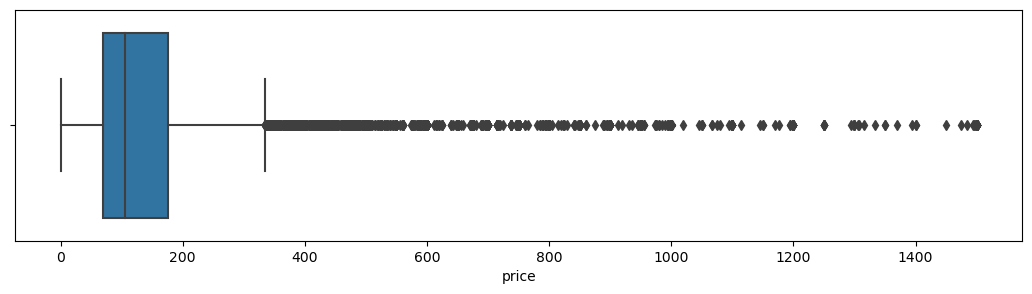

In [11]:
plotter(df[df['price']<=1500],'price',13,3)
df=df[df['price']<=1500]

* **'minimum_nights'** Column
* Listings with too many **'minimum_nights'** values can be considered as outliers.

<Axes: xlabel='minimum_nights', ylabel='count'>

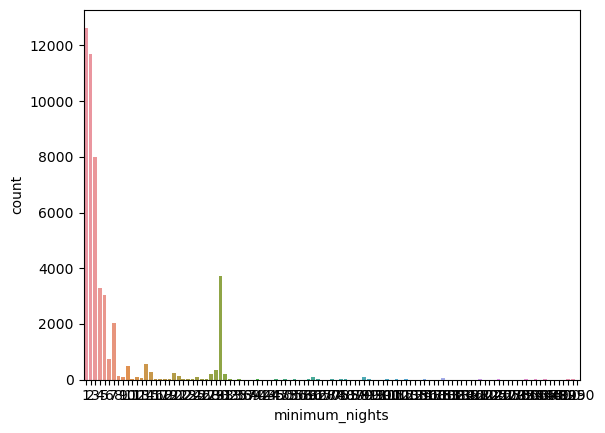

In [12]:
sns.countplot(x='minimum_nights', data=df)

* As seen in the graph above, it may be pointless to consider values over 30 days.
* We are droping rows with **'minimum_nights'** column is greater than 30. 

In [13]:
# Total number up to 30.
print("Total row number: ")
print(df.groupby('minimum_nights')['id'].nunique().head(30).sum())
df=df[df['minimum_nights']<=30]    # Dropping


Total row number: 
47992


* **'number_of_reviews'** Column

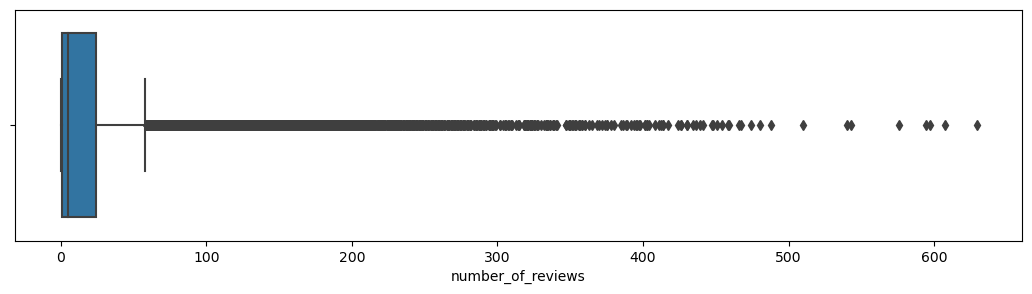

In [14]:
plotter(df,'number_of_reviews',13,3)

Above the threshold is considered an outlier.

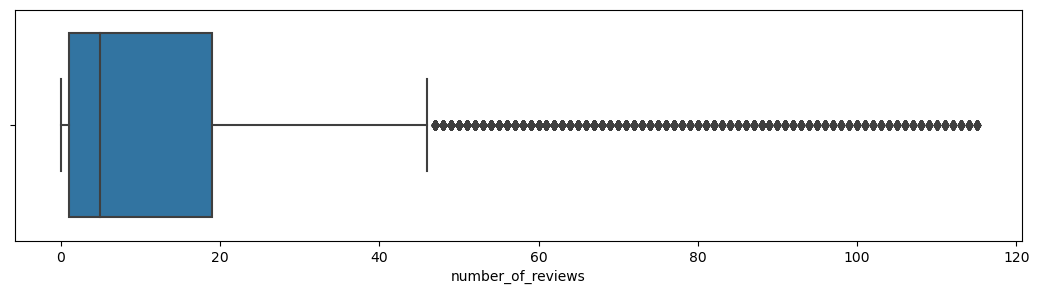

In [15]:
threshold = df['number_of_reviews'].quantile(0.95)  # Thresholdun üzeri outlier olarak kabul edildi.
plotter(df[df['number_of_reviews'] <= threshold],'number_of_reviews',13,3)

df=df[df['number_of_reviews'] <= threshold] #Delete outliers.


## Imputation
* Lets check number of missing values

In [16]:
def MissingNum(data):
    columns_with_missing_val=data.columns[data.isna().any()].tolist()

    print("Total number of missing values:")
    print(data[columns_with_missing_val].isna().sum())
    print()
    print("Total number of rows:")
    print(data.shape[0])

In [17]:
MissingNum(df)

Total number of missing values:
reviews_per_month    9664
dtype: int64

Total number of rows:
45620


Missing values account for almost 1 in 5 of the total data size. Filling these values with the average strategy can cause that specific value to dominate the data, so more advanced filling methods should be used. We are going to imput right after data splitting part with Knn imputation!

## Encoding and Scaling


### Data Splitting
* First, we decide on the columns to be used in the prediction models.
* Then split the data into train and test sets.
* Data splitting should be done before all preprocessing operations to avoid data leakage.

In [18]:
df=df.drop(columns=['id','name','host_id','host_name','latitude','longitude','neighbourhood'])
# Train- Test split
X=df.drop('neighbourhood_group',axis=1)
y=df['neighbourhood_group']                   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
# Print the sizes
print("X_train size:", X_train.shape)
print("X_test size:", X_test.shape)

X_train size: (34215, 8)
X_test size: (11405, 8)


In [20]:
X_train.head()

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighborhood_mean_price
44083,Entire home/apt,194,1,0,NaN,3,89,287.103352
21442,Entire home/apt,130,3,66,2.36,1,257,143.826142
43203,Entire home/apt,115,30,1,0.77,1,311,117.187778
11025,Entire home/apt,125,2,1,0.02,1,0,84.815597
18556,Private room,60,1,55,1.59,1,57,118.952542


In [21]:
numeric_features=['minimum_nights','number_of_reviews','reviews_per_month',
                  'calculated_host_listings_count','availability_365','neighborhood_mean_price']

categoric_features=['room_type']

#### KNN Imputation

In [22]:
# Separate the training and testing data into numeric and categorical parts
X_train_numeric = X_train[numeric_features]
X_test_numeric = X_test[numeric_features]
X_train_categorical = X_train[categoric_features]
X_test_categorical = X_test[categoric_features]

# Impute missing values in numeric columns using KNN 
knn_imputer = KNNImputer(n_neighbors=5)  
X_train_numeric_imputed = knn_imputer.fit_transform(X_train_numeric)
X_test_numeric_imputed = knn_imputer.transform(X_test_numeric)
X_train_numeric_imputed = pd.DataFrame(X_train_numeric_imputed, columns=numeric_features)
X_test_numeric_imputed = pd.DataFrame(X_test_numeric_imputed, columns=numeric_features)


X_train = pd.concat([X_train_numeric_imputed, X_train_categorical], axis=1)
X_test = pd.concat([X_test_numeric_imputed, X_test_categorical], axis=1)



#### All rows imputet with KNN

In [23]:
MissingNum(X_test)
print()
MissingNum(X_train)

Total number of missing values:
Series([], dtype: float64)

Total number of rows:
11405

Total number of missing values:
Series([], dtype: float64)

Total number of rows:
34215


Codes below,
* **'get_dummies'** : Encodes categorical features with one-hot encoding.
* **'StandartScaler'** : Standardizes the features of the dataset. (Z=x-mean / std)
* Since Standart scaling is linear transformation, it does not matter which one is applied first.

In [24]:
X_train=pd.get_dummies(X_train,columns=categoric_features,drop_first=False,dtype='int')
X_test=pd.get_dummies(X_test,columns=categoric_features,drop_first=False,dtype='int')

StS=StandardScaler()
X_train=StS.fit_transform(X_train)
X_test=StS.transform(X_test)

X_train.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighborhood_mean_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
44083,-0.569155,-0.649987,-0.611217,-0.128759,-0.144280,2.157448,0.965833,-0.920577,-0.156503
21442,-0.329291,2.139453,0.943567,-0.187904,1.138788,-0.137085,0.965833,-0.920577,-0.156503
43203,2.908880,-0.607723,-0.194604,-0.187904,1.551203,-0.563689,0.965833,-0.920577,-0.156503
11025,-0.449223,-0.607723,-0.731477,-0.187904,-0.824000,-1.082118,0.965833,-0.920577,-0.156503
18556,-0.569155,1.674546,0.392377,-0.187904,-0.388673,-0.535427,-1.035376,1.086275,-0.156503


## Multicollinearity Check
1) Draw a heatmap to check feature correlation at first glance.
2) Calculate VIF scores successively.
3) Delete the columns that need to be deleted and then repeat steps 2 and 3 until you get a clean result.

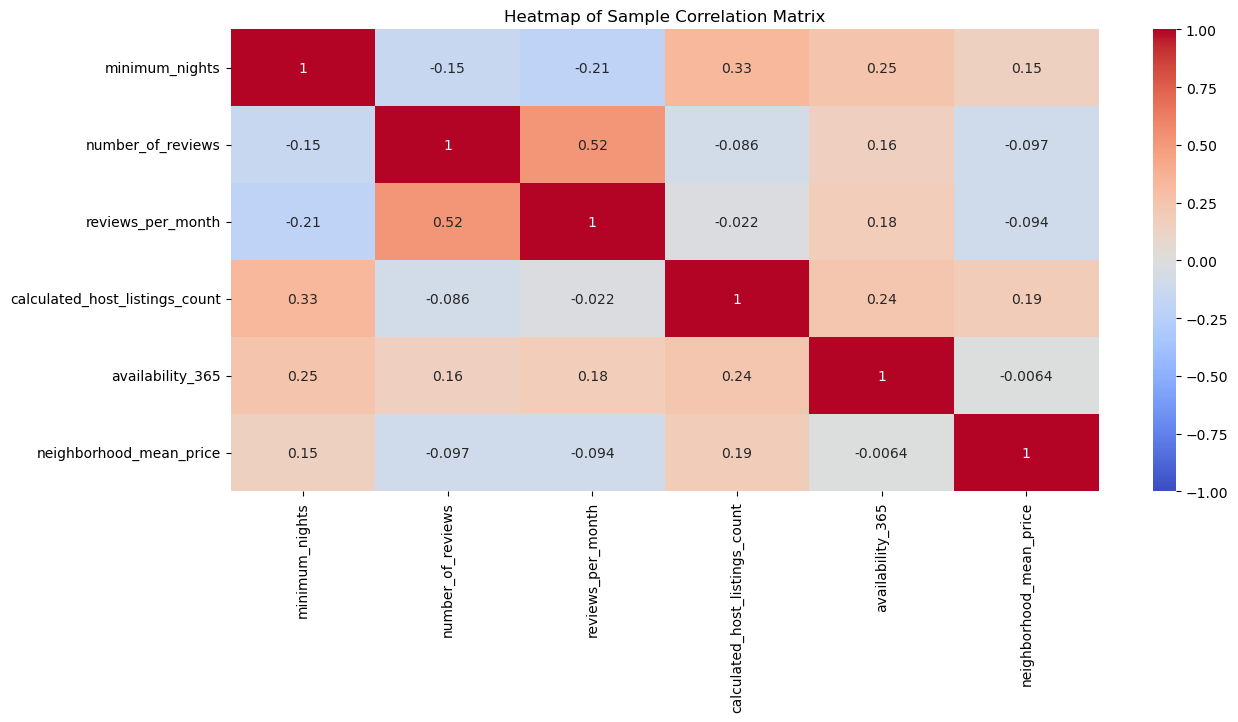

In [25]:
# Corr matrisinin heatmap üzerinde gösterilmesi

corr=X_train[numeric_features].corr()

plt.rcParams['figure.figsize'] = [14, 6]

sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.title('Heatmap of Sample Correlation Matrix')
plt.show()

In [26]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_VIF(X_train, numeric_features):
    X_train_copy = X_train.copy()  # create a copy to avoid modifying the original dataframe
    X_train_copy['intercept'] = 1  # add an intercept column

    vif_df = pd.DataFrame()  # create an empty data frame
    vif_df["feature"] = X_train_copy[numeric_features].columns  # attach a column named feature which involves feature names of X df

    vif_df["VIF"] = 0  # attach VIF column

    for i in range(len(X_train_copy[numeric_features].columns)):
        vif_df.loc[i, 'VIF'] = variance_inflation_factor(X_train_copy[numeric_features].values, i)  # calculate VIF for each feature #ignore intercept row

    vif_df = vif_df.sort_values(by='VIF', ascending=False)

    # remove intercept column
    X_train_copy = X_train_copy.drop(columns=['intercept'], axis=1)
    return vif_df, X_train_copy

In [27]:
vif_1,X_train=calculate_VIF(X_train,numeric_features)
print(vif_1)

                          feature       VIF
2               reviews_per_month  1.451458
1               number_of_reviews  1.402467
0                  minimum_nights  1.261536
3  calculated_host_listings_count  1.192678
4                availability_365  1.188168
5         neighborhood_mean_price  1.058227


*  In fact, since our dataset contains categorical data, it may not make sense to examine 'VIF' scores. It makes sense to examine 'VIF' before using regression-based models. If we are working with tree-structured models, feature screening based on the 'VIF' score may often not be necessary. We can deal with the multicollinearity problem in later sections when we apply Logistic Regression.

In [28]:
X_train.head(3)

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighborhood_mean_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
44083,-0.569155,-0.649987,-0.611217,-0.128759,-0.144280,2.157448,0.965833,-0.920577,-0.156503
21442,-0.329291,2.139453,0.943567,-0.187904,1.138788,-0.137085,0.965833,-0.920577,-0.156503
43203,2.908880,-0.607723,-0.194604,-0.187904,1.551203,-0.563689,0.965833,-0.920577,-0.156503


## Random Forest

#### Randomized Search

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score

param_dist = {
    'n_estimators': np.arange(100, 800, 50),  
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(5, 151, 5), 
    'min_samples_split': np.arange(10, 250, 5), 
    'min_samples_leaf': np.arange(1, 100, 5),
    'max_leaf_nodes':np.arange(20,150,5)
}

# Create the RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

# Create the RandomizedSearchCV model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=10, cv=3, n_jobs=-1, random_state=42, verbose=2)

# Fit the Model with train data
random_search.fit(X_train, y_train)

# Print the best parameters and scores
print("Best Parameters:", random_search.best_params_)
best_rf = random_search.best_estimator_

# Train Scores
y_train_pred = best_rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Test score
y_test_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\Win10\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Win10\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Win10\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Win10\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Win10\anaconda3\Lib\site-packages\s

Best Parameters: {'n_estimators': 400, 'min_samples_split': 160, 'min_samples_leaf': 26, 'max_leaf_nodes': 115, 'max_features': 'log2', 'max_depth': 70}
Training Accuracy: 0.8622533976326173
Test Accuracy: 0.8635686102586585


#### Validation Curve 
We will draw a validation curve using values around the parameter values from Randomized Search. We aim to improve the performance of our model. Since Randomized Search does not try all values in the given hyperparameter scales, we aim to catch values that it may have missed with the validation curve.

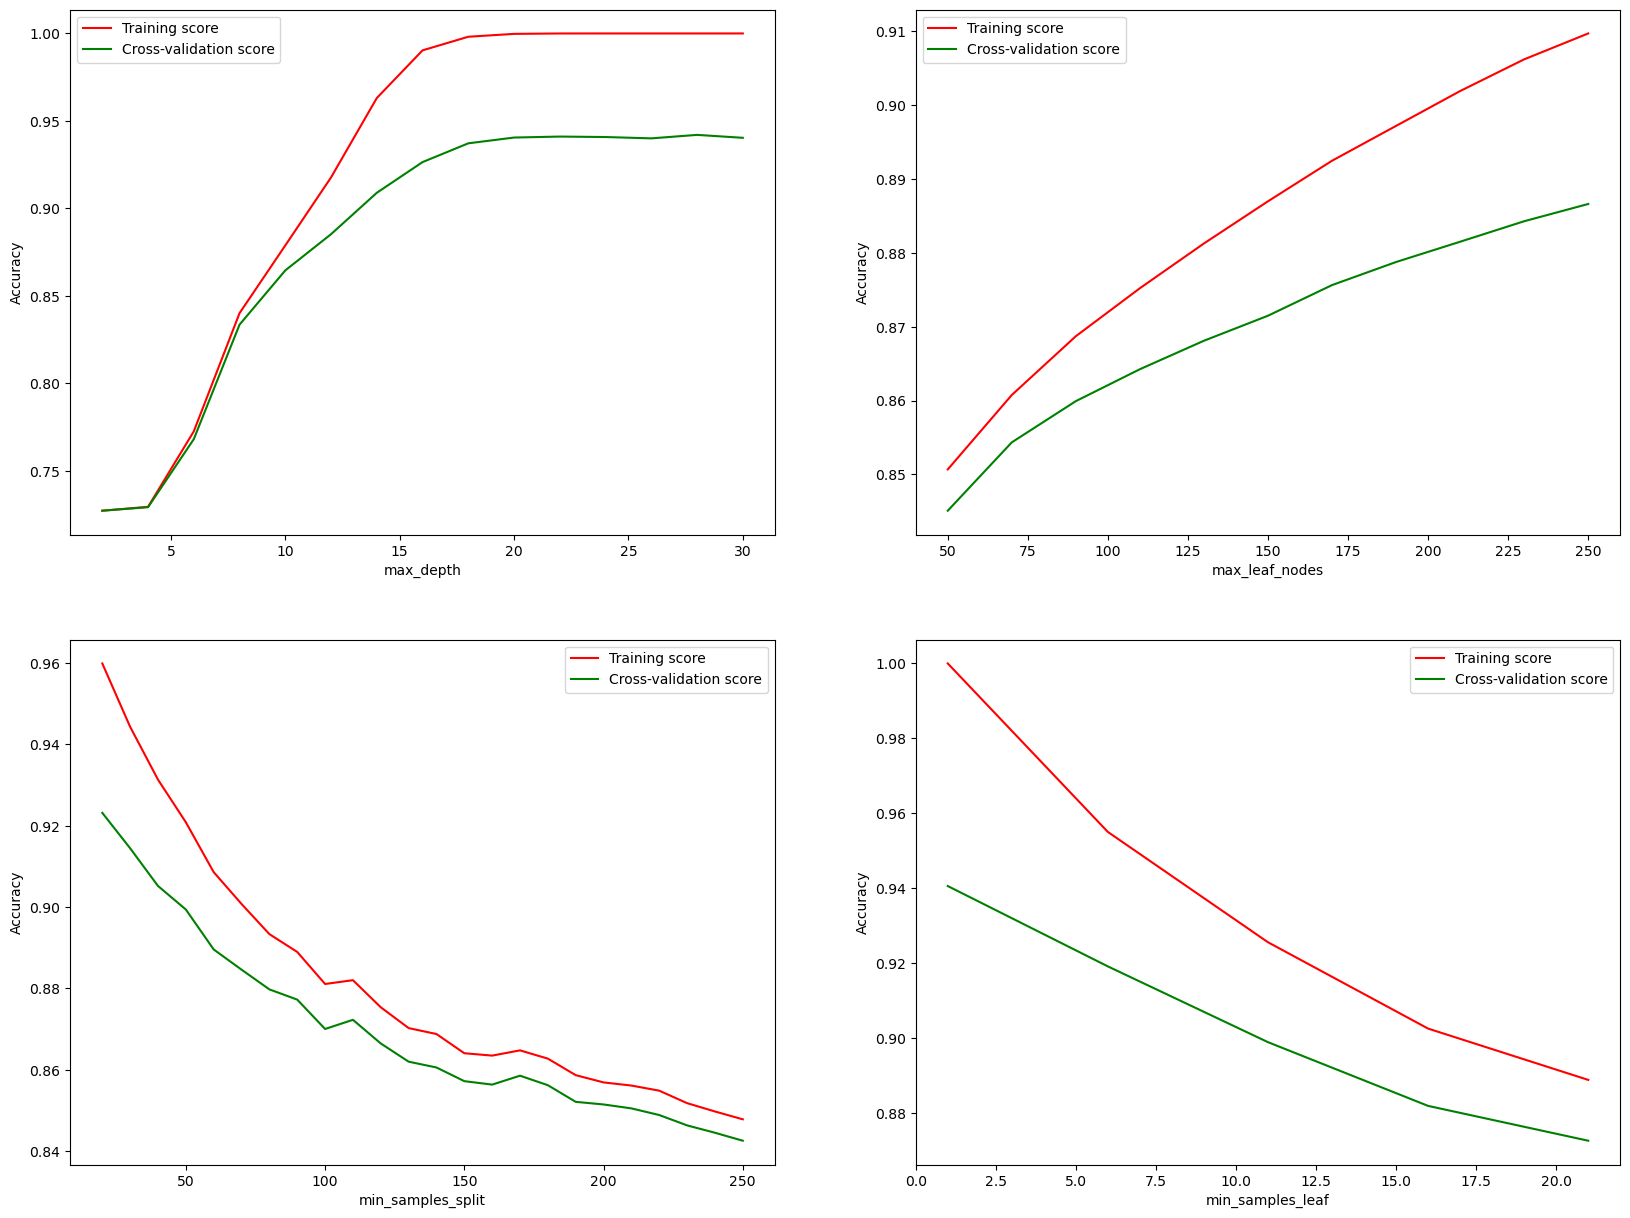

In [200]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


# RandomForestClassifier modeli
rf_classifier = RandomForestClassifier(random_state=1773)

# Parametre adları ve aralıkları
param_names = ["max_depth", "max_leaf_nodes", "min_samples_split", "min_samples_leaf"]
param_ranges = [list(range(2, 31, 2)), list(range(50, 251, 20)), list(range(20, 251, 10)), list(range(1, 22,5))]

# Create figure space
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

for i, ax in enumerate(axes.reshape(-1), 0):
    # Validation curve hesaplama
    train_scores, test_scores = validation_curve(
        rf_classifier, X_train, y_train,
        param_name=param_names[i], param_range=param_ranges[i],
        cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=1773),
        scoring="accuracy", n_jobs=-1
    )

    # Skorların ortalamasını alma
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # Plot
    ax.plot(param_ranges[i], train_scores_mean, label="Training score", color="r")
    ax.plot(param_ranges[i], test_scores_mean, label="Cross-validation score", color="g")
    ax.set_xlabel(param_names[i])
    ax.set_ylabel("Accuracy")
    ax.legend()

plt.show()

Parameters are selected after validation curve investigation.
* **max_depth:** 18
* **max_leaf_nodes:** 100
* **min_samples_split:** 100
* **min_samples_leaf:** 13

In [265]:
rf_best = RandomForestClassifier(random_state=42, max_depth=18,max_leaf_nodes=175,min_samples_split=100,min_samples_leaf=7)

#Training the model
rf_best.fit(X_train, y_train)


y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# Train and Test scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Score For Best RF: {train_accuracy}")
print(f"Test Score For Best RF: {test_accuracy}")

Train Score For Best RF: 0.8850504164839983
Test Score For Best RF: 0.8770714598860149


c:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
                precision    recall  f1-score   support

        Bronx       0.69      0.05      0.08       243
     Brooklyn       0.85      0.95      0.90      4647
    Manhattan       0.93      0.94      0.93      5109
       Queens       0.76      0.60      0.67      1315
Staten Island       0.00      0.00      0.00        91

     accuracy                           0.88     11405
    macro avg       0.64      0.51      0.52     11405
 weighted avg       0.86      0.88      0.86     11405



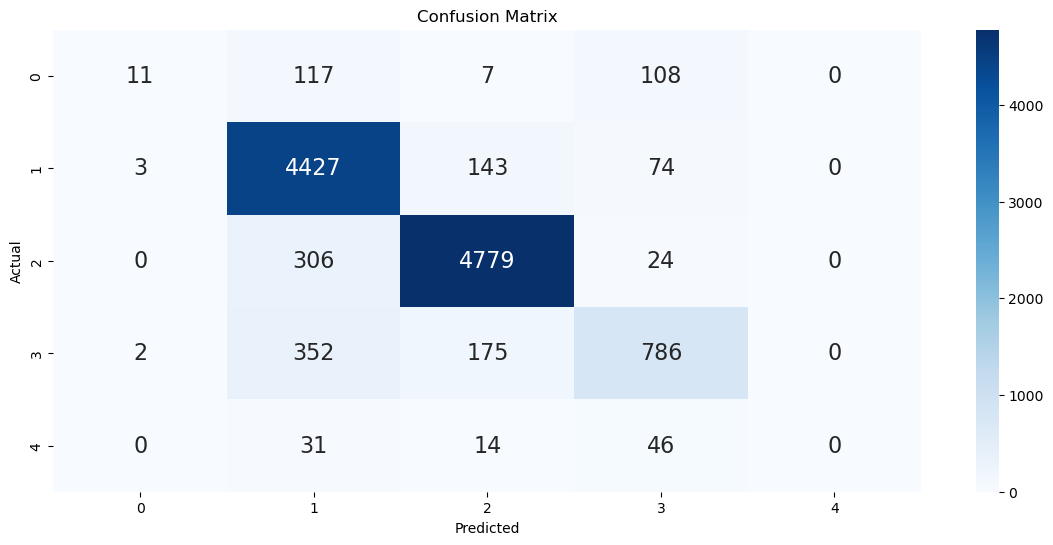

In [266]:
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

It seems that Staten Island data is quite small compared to the others. Therefore, it does not produce accurate predictions. We will use the **RandomOverSampler** method to equalize the sample sizes and hopefully produce better estimates.

In [29]:
from imblearn.over_sampling import RandomOverSampler

# RandomOverSampler'ı oluşturma
oversampler = RandomOverSampler(sampling_strategy='not majority', random_state=42)

# Eğitim seti üzerinde oversampling işlemi uygulama
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

### New Randomized Search for Resampled data

Randomized Search results

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score

param_dist = {
    'n_estimators': np.arange(100, 800, 50),  # Values from 100 to 500 with a step of 100
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(5, 151, 5),  # Values from 10 to 50 with a step of 10
    'min_samples_split': np.arange(10, 250, 5),  # Values from 2 to 10 with a step of 2
    'min_samples_leaf': np.arange(1, 100, 5),# Values from 1 to 4 with a step of 2
    'max_leaf_nodes':np.arange(20,150,5)
}

# Create the RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

# Create the RandomizedSearchCV model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=10, cv=3, n_jobs=-1, random_state=42, verbose=2)

# Fit the RandomizedSearchCV model on the training data
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)

# Get the best model
best_rf = random_search.best_estimator_

# Predictions on training set
y_train_pred = best_rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Predictions on test set
y_test_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 35, 'min_samples_leaf': 41, 'max_leaf_nodes': 130, 'max_features': 'sqrt', 'max_depth': 130}
Training Accuracy: 0.7992400993716207
Test Accuracy: 0.7874616396317404


Validation Curve for resampled data

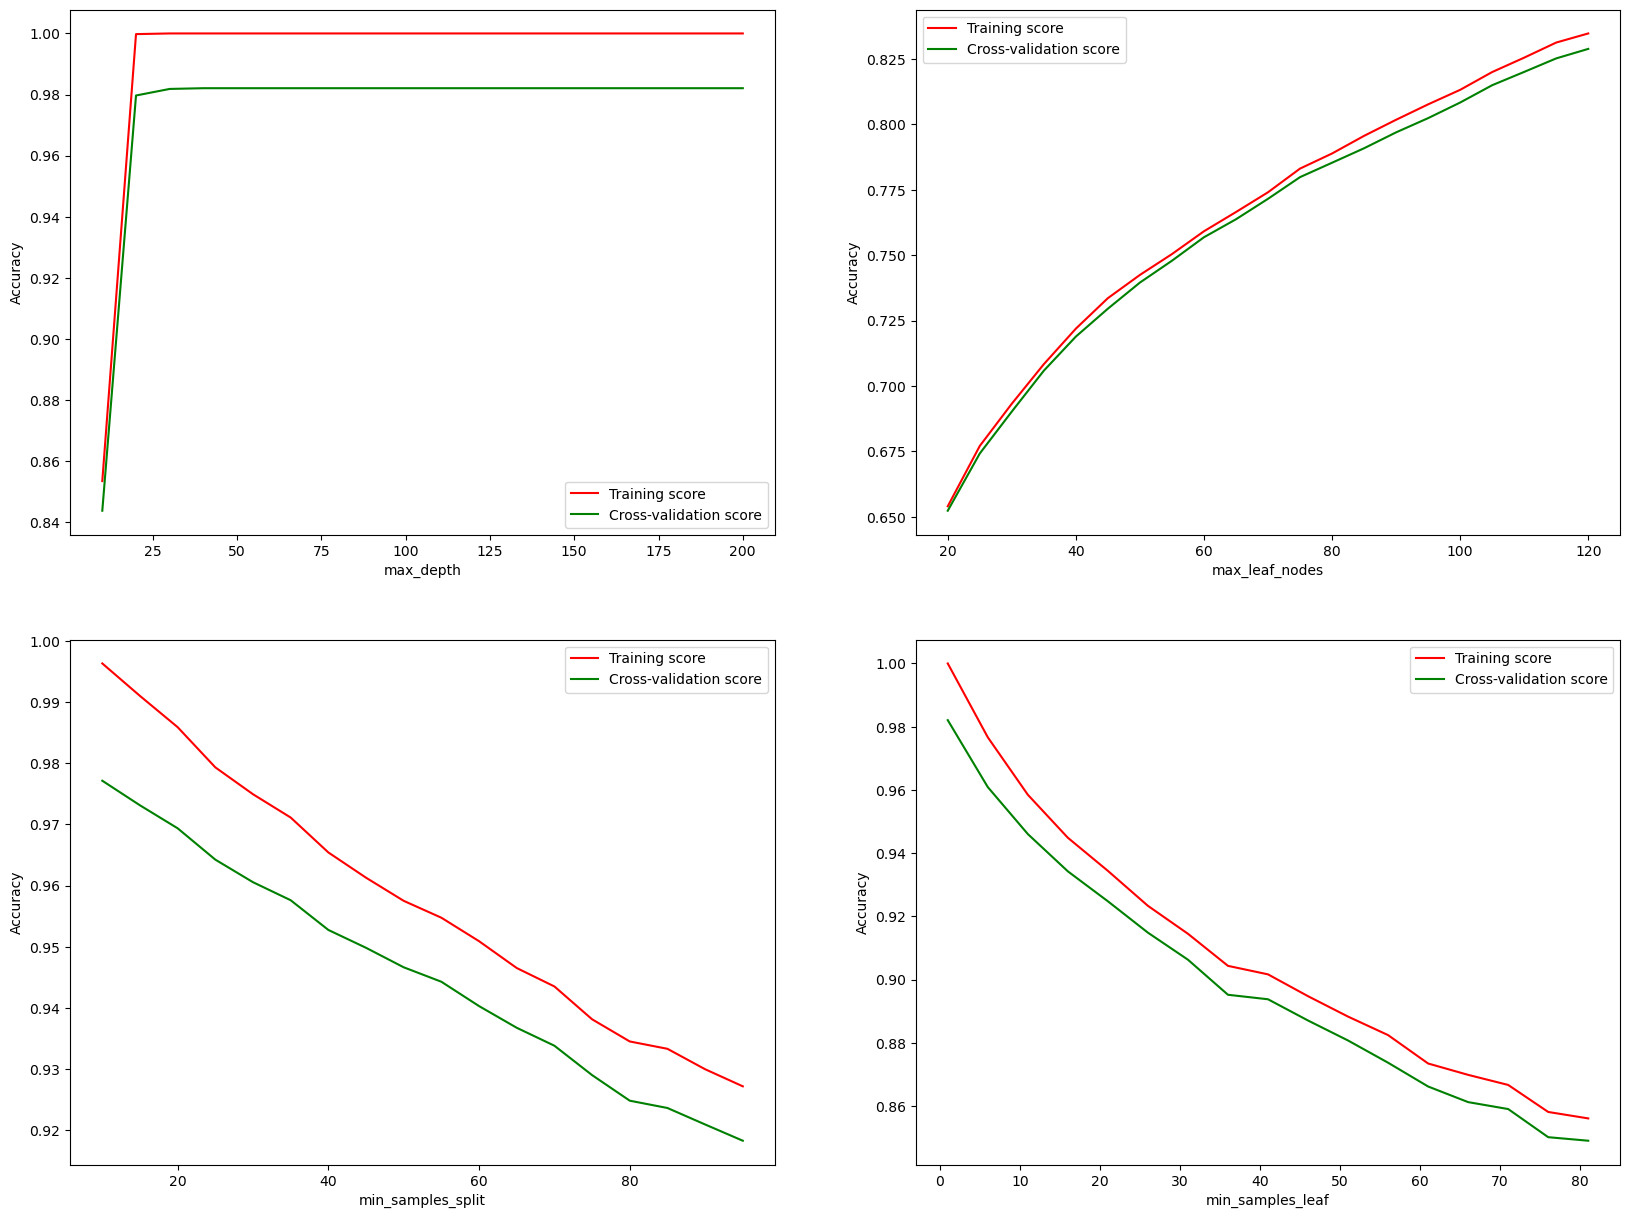

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


# RandomForestClassifier modeli
rf_classifier = RandomForestClassifier(random_state=1773)

# Parametre adları ve aralıkları
param_names = ["max_depth", "max_leaf_nodes", "min_samples_split", "min_samples_leaf"]
param_ranges = [list(range(10, 201, 10)), list(range(20, 121, 5)), list(range(10, 100, 5)), list(range(1, 82,5))]

# Create figure space
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

for i, ax in enumerate(axes.reshape(-1), 0):
    # Validation curve hesaplama
    train_scores, test_scores = validation_curve(
        rf_classifier, X_train_resampled, y_train_resampled,
        param_name=param_names[i], param_range=param_ranges[i],
        cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=1773),
        scoring="accuracy", n_jobs=-1
    )

    # Skorların ortalamasını alma
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # Plot
    ax.plot(param_ranges[i], train_scores_mean, label="Training score", color="r")
    ax.plot(param_ranges[i], test_scores_mean, label="Cross-validation score", color="g")
    ax.set_xlabel(param_names[i])
    ax.set_ylabel("Accuracy")
    ax.legend()

plt.show()

Model with best parameters

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_best = RandomForestClassifier(random_state=42, max_depth=15,max_leaf_nodes=500,min_samples_split=40,min_samples_leaf=42)

#Training the model
rf_best.fit(X_train_resampled, y_train_resampled)

# Prediction on train set
y_train_resampled_pred = rf_best.predict(X_train_resampled)

# Prediction on test set
y_test_resampled_pred = rf_best.predict(X_test)

# Printing train and test scores
train_accuracy = accuracy_score(y_train_resampled, y_train_resampled_pred)
test_accuracy = accuracy_score(y_test, y_test_resampled_pred)
print(f"Train Score For Best RF: {train_accuracy}")
print(f"Test Score For Best RF: {test_accuracy}")

Train Score For Best RF: 0.9043512921012423
Test Score For Best RF: 0.8450679526523455


when max_leaf_nodes=500 the score was 90-84. I reduced the number of nodes to prevent overfit and this time it was 76-75. During the hyperparameter settings I realized that the resampled data was almost only affected by the max_leaf_nodes parameter.


Classification Report:
                precision    recall  f1-score   support

        Bronx       0.21      0.81      0.33       243
     Brooklyn       0.91      0.81      0.85      4647
    Manhattan       0.98      0.78      0.87      5109
       Queens       0.42      0.62      0.50      1315
Staten Island       0.15      0.53      0.24        91

     accuracy                           0.77     11405
    macro avg       0.53      0.71      0.56     11405
 weighted avg       0.86      0.77      0.80     11405



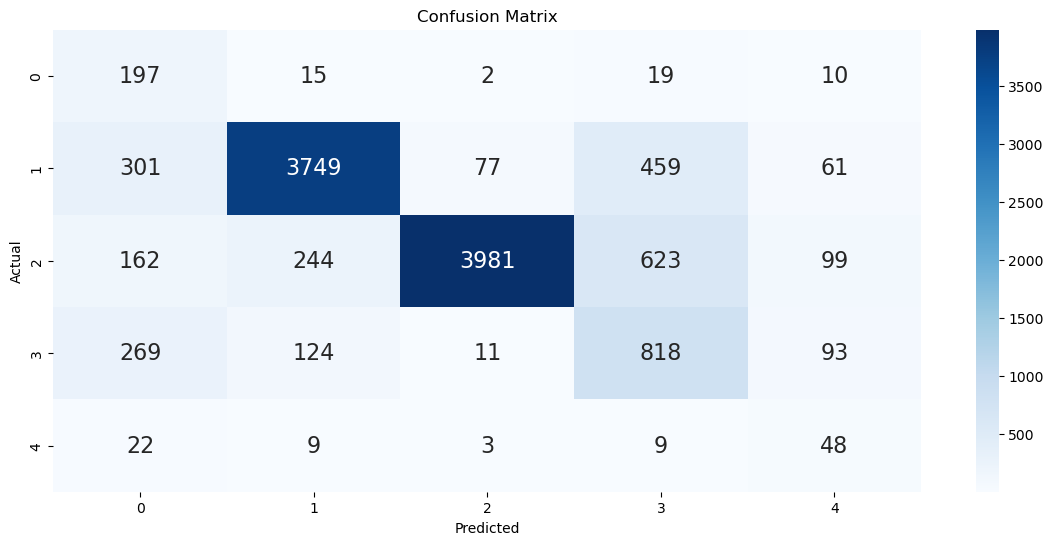

In [56]:
from sklearn.metrics import classification_report, confusion_matrix


print("\nClassification Report:\n", classification_report(y_test, y_test_resampled_pred))

confusion_matrix(y_test, y_test_resampled_pred)
sns.heatmap(confusion_matrix(y_test, y_test_resampled_pred), annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

When resampled data was used, the Staten Island region was included in the prediction, but our scores dropped considerably. Which method is useful depends on the purpose and scenarios. For our scenario, I think it is better to work with our classic dataset.

## Logistic Regression

Creat and train the model

In [97]:
from sklearn.linear_model import LogisticRegression


multi_model = LogisticRegression(penalty=None, 
                                 solver='lbfgs', 
                                 multi_class='multinomial')

multi_model.fit(X_train, y_train)
multi_model.classes_

c:\Users\Win10\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)


Classification Report:
                precision    recall  f1-score   support

        Bronx       0.13      0.71      0.22       243
     Brooklyn       0.68      0.47      0.56      4647
    Manhattan       0.85      0.73      0.78      5109
       Queens       0.29      0.19      0.23      1315
Staten Island       0.01      0.25      0.03        91

     accuracy                           0.56     11405
    macro avg       0.39      0.47      0.36     11405
 weighted avg       0.69      0.56      0.61     11405



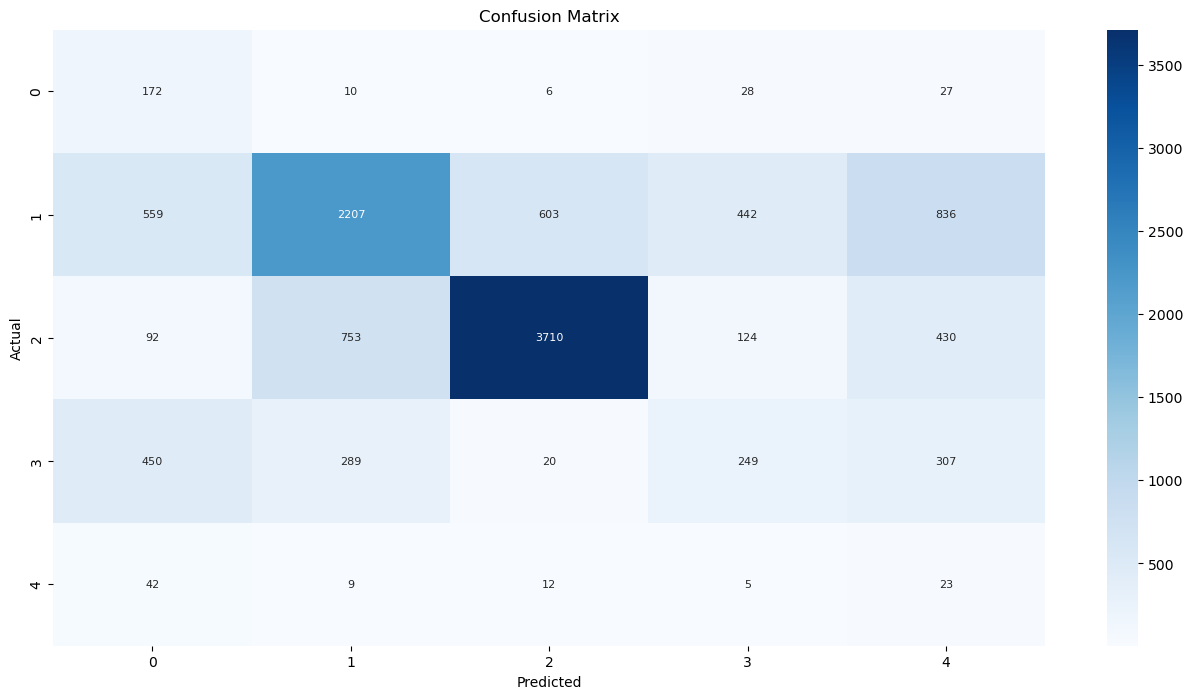

In [98]:
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='g', cmap='Blues', annot_kws={"size": 8})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [99]:
print("Accuracy:%.2f " % (multi_model.score(X_test, y_test)*100)) 


Accuracy:69.43 


When I used resampled data, the score was lower: **55.77**
we stop working with resampled data.

#### Grid search for logistic regression

In [102]:

# Hyperparameters for our model
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [ 1, 10, 15,30,50],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Creating the model
base_model = LogisticRegression()


grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Train the model
grid_search.fit(X_train, y_train)

# Print best params
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\Win10\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
225 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Win10\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Win10\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Win10\anaconda3\Lib\site-packages\sklearn\linear_model\_

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.6911003945637878


c:\Users\Win10\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Grid Search is not effective. 


## Conclusion

Probably because the dataset is suitable for the random forest model, I got more reliable results. While working on the models, I realized that the distribution of categorical values in the dataset can change the whole process from the beginning to the end. I tried new methods to solve for unevenly distributed target data, but I did not find successful results.